# Machine Learning

### (The project's data comes from Kaggle. <Train.csv> is used for ml training and <test.csv> is used for testing model.)
--- 
## **Description**: </br> </br> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 
## **Goal**: </br> </br>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # remove all warnings from the output
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',-1)

In [4]:
# use sklearn library KNN method
from sklearn.impute import KNNImputer

In [5]:
# KNN used to fill null value
def null_KNNfill (df, n):
    dfnull_list=df.values.tolist()
    
    imputer = KNNImputer(n_neighbors=n)
    knnlist_fill = imputer.fit_transform(dfnull_list)
    df_frame=pd.DataFrame(knnlist_fill)
    return df_frame

In [6]:
# use the first unique value to fill null if the null percentage is not higher than 20% 
def unique_fill (df,column):
    uni_value = df[column].unique()[0]
    df[column].fillna(uni_value,inplace=True)
    return df[column].isnull().sum()

In [7]:
# read house price data file
df_house=pd.read_csv('train.csv')

In [8]:
# get general info about data
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
#pick out feature having bull value
null_feature = [i for i in df_house.columns if df_house[i].isnull().sum() !=0]
null_feature

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Look at each feature with null

In [10]:
#calculate null percentage
def null(df, feature, plot=False):
    t = df[feature].isna().mean() * 100
    print(f'% of null: {t}%')
    if plot:
        sns.countplot(df[feature], palette='Set3')

### LotFontage (Linear feet of street connected to property)

In [11]:
null(df_house,'LotFrontage')

% of null: 17.73972602739726%


In [12]:
#use mean value to fill null in lotFontage
df_house['LotFrontage'].fillna(df_house['LotFrontage'].mean(), inplace=True)
df_house['LotFrontage'].isnull().sum()

0

### Alley (Type of alley access to property)

In [13]:
# df_house['Alley'].value_counts()

% of null: 93.76712328767123%


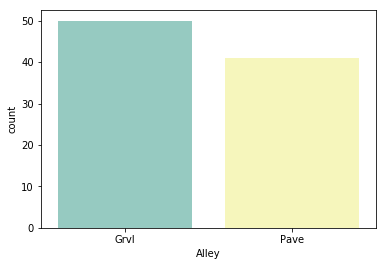

In [14]:
null(df_house,'Alley',True)

In [15]:
#  as its null percent is high, drop it (more than 90%)
df_house.drop('Alley', axis=1, inplace = True)

### MasVnrType (Masonry veneer type)

In [16]:
# df_house['MasVnrType'].value_counts()

% of null: 0.547945205479452%


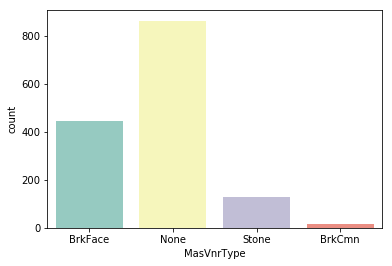

In [17]:
null(df_house,'MasVnrType',True)

In [18]:
unique_fill(df_house,'MasVnrType')

0

### MasVnrArea (Masonry veneer area in square feet)

In [19]:
null(df_house,'MasVnrArea')

% of null: 0.547945205479452%


In [20]:
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].mean(), inplace=True)

### BsmtQual (Evaluates the height of the basement)

% of null: 2.5342465753424657%


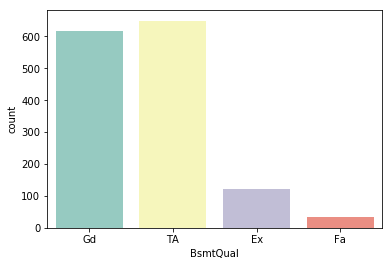

In [21]:
null(df_house,'BsmtQual',True)

In [22]:
unique_fill(df_house,'BsmtQual')

0

### BsmtCond (Evaluates the general condition of the basement)

% of null: 2.5342465753424657%


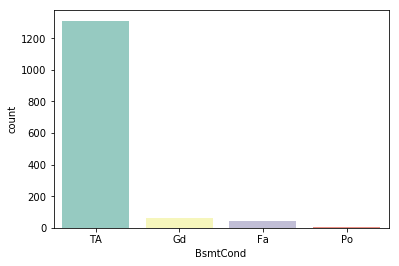

In [23]:
null(df_house,'BsmtCond',True)

In [24]:
unique_fill(df_house,'BsmtCond')

0

### BsmtExposure (Refers to walkout or garden level walls)

% of null: 2.6027397260273974%


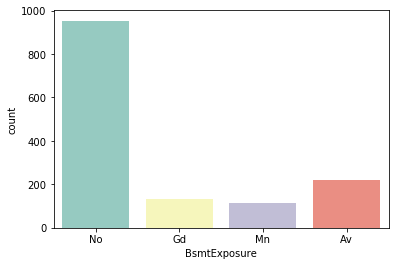

In [25]:
null(df_house,'BsmtExposure',True)

In [26]:
unique_fill(df_house,'BsmtExposure')

0

### BsmtFinType1 (Rating of basement finished area)

% of null: 2.5342465753424657%


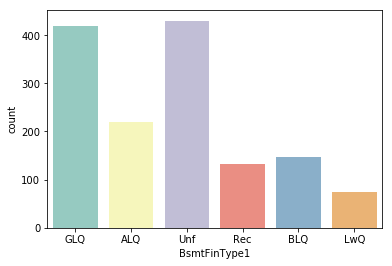

In [27]:
null(df_house,'BsmtFinType1',True)

In [28]:
unique_fill(df_house,'BsmtFinType1')

0

### BsmtFinType2 (Rating of basement finished area (if multiple types))

% of null: 2.6027397260273974%


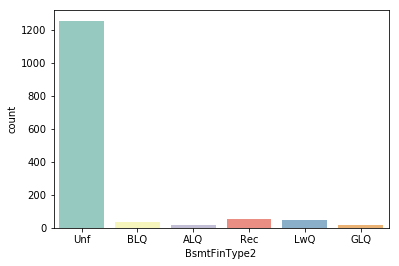

In [29]:
null(df_house,'BsmtFinType2',True)

In [30]:
unique_fill(df_house,'BsmtFinType2')

0

### Electrical (Electrical system)

% of null: 0.0684931506849315%


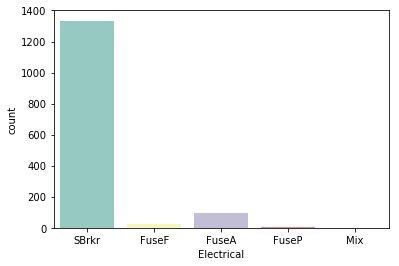

In [31]:
null(df_house,'Electrical',True)

In [32]:
unique_fill(df_house,'Electrical')

0

### FireplaceQu (Fireplace quality)

% of null: 47.26027397260274%


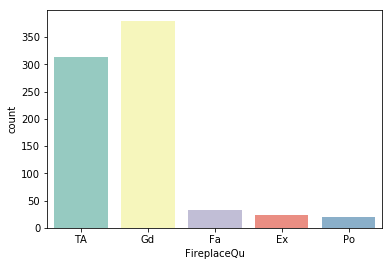

In [33]:
null(df_house,'FireplaceQu',True)

In [34]:
df_house['FireplaceQu'].fillna('None',inplace=True)#around 50% isnull,so only can use none to fill.

### GarageType (Garage location)

% of null: 5.5479452054794525%


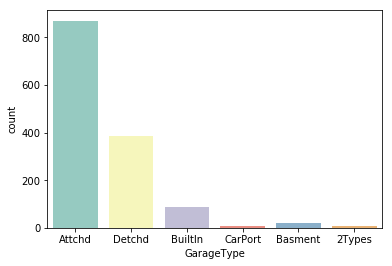

In [35]:
null(df_house,'GarageType',True)

In [36]:
unique_fill(df_house,'GarageType')

0

### GarageYrBlt (Year garage was built)

In [37]:
null(df_house,'GarageYrBlt')

% of null: 5.5479452054794525%


In [38]:
mode_garyr=df_house['GarageYrBlt'].mode()

In [39]:
# use mode value to fill null value
df_house['GarageYrBlt'].fillna(mode_garyr,inplace=True)

In [40]:
# null_KNNfill(df_house[['MSSubClass','LotArea','YearBuilt','YearRemodAdd','GarageYrBlt']],4)

### GarageFinish (Interior finish of the garage)

% of null: 5.5479452054794525%


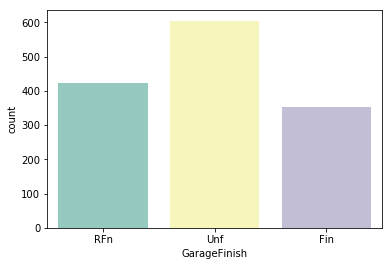

In [41]:
null(df_house,'GarageFinish',True)

In [42]:
unique_fill(df_house,'GarageFinish')

0

### GarageQual (Garage quality)

% of null: 5.5479452054794525%


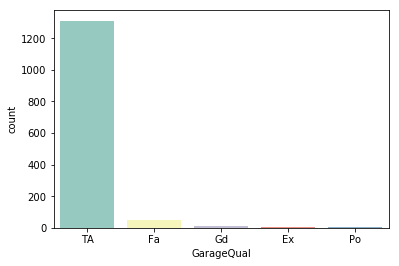

In [43]:
null(df_house,'GarageQual',True)

In [44]:
unique_fill(df_house,'GarageQual')

0

### GarageCond (Garage condition)

% of null: 5.5479452054794525%


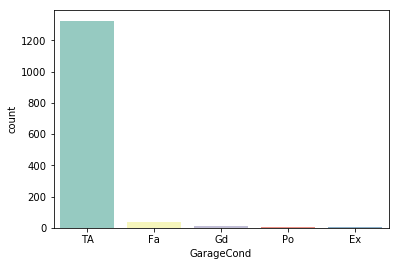

In [45]:
null(df_house,'GarageCond',True)

In [46]:
unique_fill(df_house,'GarageCond')

0

### PoolQC (Pool quality)

% of null: 99.52054794520548%


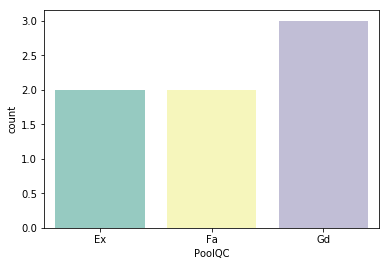

In [47]:
null(df_house,'PoolQC',True)

In [48]:
# as null percentage is quite high, drop it
df_house.drop('PoolQC', axis=1, inplace= True)

### Fence (Fence quality)

% of null: 80.75342465753424%


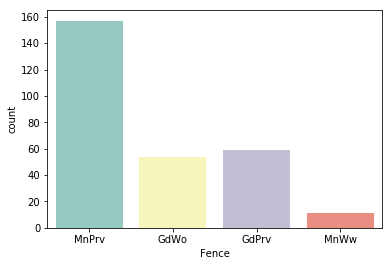

In [49]:
null(df_house,'Fence',True)

In [50]:
# null percentage is lower than 90%, but still high, fill with None
df_house['Fence'].fillna('None', inplace=True)

### MiscFeature (Miscellaneous feature not covered in other categories)

% of null: 96.30136986301369%


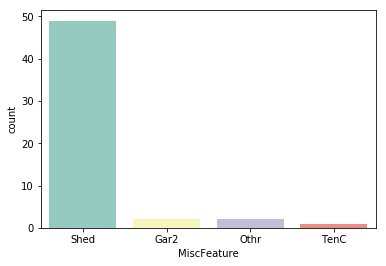

In [51]:
null(df_house,'MiscFeature',True)

In [52]:
# as null percentage is quite high, drop it
df_house.drop('MiscFeature', axis=1, inplace= True)

### Encoding

In [53]:
#set y and x value
y_house=df_house['SalePrice']
x_house=df_house.drop('SalePrice',axis=1)

# one label encoding before data split
from sklearn.preprocessing import LabelEncoder

x_house=x_house.apply(LabelEncoder().fit_transform)
x_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,5,3,36,327,1,3,3,0,4,...,0,0,0,0,4,0,1,2,8,4
1,1,0,3,52,498,1,3,3,0,2,...,0,0,0,0,4,0,4,1,8,4
2,2,5,3,39,702,1,0,3,0,4,...,0,0,0,0,4,0,8,2,8,4
3,3,6,3,31,489,1,0,3,0,0,...,108,0,0,0,4,0,1,0,8,0
4,4,5,3,56,925,1,0,3,0,2,...,0,0,0,0,4,0,11,2,8,4
5,5,4,3,57,915,1,0,3,0,4,...,0,17,0,0,2,10,9,3,8,4
6,6,0,3,47,552,1,3,3,0,4,...,0,0,0,0,4,0,7,1,8,4
7,7,5,3,42,593,1,0,3,0,0,...,94,0,0,0,4,2,10,3,8,4
8,8,4,4,22,138,1,3,3,0,4,...,83,0,0,0,4,0,3,2,8,0
9,9,14,3,21,222,1,3,3,0,0,...,0,0,0,0,4,0,0,2,8,4


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x_house,y_house,test_size=0.3,random_state=0)

In [55]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred=cross_val_score(model,x_house,y_house,cv=5,scoring='r2')
    return pred

def print_evaluate (true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    print('MAE:',mae)
    print('MSE:',mse)
    print('RMSE:',rmse)
    print('R Square:',r2_square)

def evaluate (true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    return mae, mse, rmse, r2_square  


### Linear Regression 

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True,
                        fit_intercept=True,
                        copy_X=True,
                        n_jobs=None)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [57]:
print(lin_reg.intercept_)#y=ax+b里面b的值

75011.65060109613


In [58]:
coeff=pd.DataFrame(lin_reg.coef_,x_house.columns,columns=['Coefficient'])#a的值 ，a也是weight
coeff.sort_values('Coefficient') # coefficient lower, more relevant 

,Coefficient
Condition2,-38540.011600
Utilities,-37095.700995
KitchenAbvGr,-25567.432299
ExterQual,-9939.417017
BsmtQual,-9676.360186
KitchenQual,-6308.761583
BedroomAbvGr,-4503.450461
BldgType,-2852.135215
HouseStyle,-2186.394717
Condition1,-2122.006010


In [59]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('train set evaluation:\n_____________')
print_evaluate(y_train,train_pred)
print('===============')
print('test set evaluation:\n_____________')
print_evaluate(y_test,test_pred)

train set evaluation:
_____________
MAE: 18407.10090122089
MSE: 771657107.4836007
RMSE: 27778.71680772171
R Square: 0.8734937789280874
test set evaluation:
_____________
MAE: 22784.338879790386
MSE: 1517554994.9783075
RMSE: 38955.80823161429
R Square: 0.7764682709979923


In [60]:
evaluate_df = pd.DataFrame(data=[["Linear Regression",*evaluate(y_test,test_pred),cross_val(LinearRegression())]],
                      columns=['Model','MAE','MSE','RMSE','R Square','Cross Validation'])#We can use this function to see the rating of the model.

In [61]:
evaluate_df

,Model,MAE,MSE,RMSE,R Square,Cross Validation
0,Linear Regression,22784.33888,1.517555e+09,38955.808232,0.776468,"[0.8711373275933946, 0.822852536696834, 0.830740142694914, 0.8502175042276299, 0.7501051937216902]"


## There is a problem: The prediction of test data has negative numbers

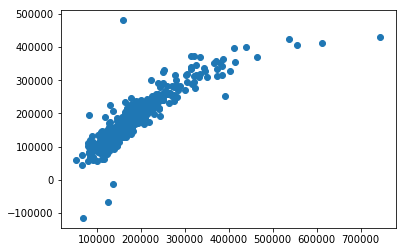

In [62]:
plt.scatter(y_test,test_pred)

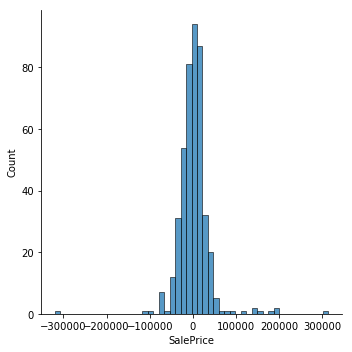

In [62]:
sns.displot((y_test-test_pred),bins=50)

### standardization scalling （为什么scaling之后表现更差了？）

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('standardscaler', StandardScaler())])
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

x_train_stand = pipe.fit_transform(x_train_stand)
x_test_stand = pipe.transform(x_test_stand)

In [178]:
pred_stand_test = lin_reg.predict(x_test_stand)
pred_stand_train = lin_reg.predict(x_train_stand)

In [179]:
evaluate_df_stand = pd.DataFrame(data=[["Linear Regression",*evaluate(y_test,pred_stand_test),cross_val(LinearRegression())]],
                      columns=['Model','MAE','MSE','RMSE','R Square','Cross Validation'])#We can use this function to see the rating of the model.

In [180]:
evaluate_df_stand

,Model,MAE,MSE,RMSE,R Square,Cross Validation
0,Linear Regression,115450.356802,2.783290e+10,166831.937542,-3.09971,"[0.8711373275933946, 0.822852536696834, 0.830740142694914, 0.8502175042276299, 0.7501051937216902]"


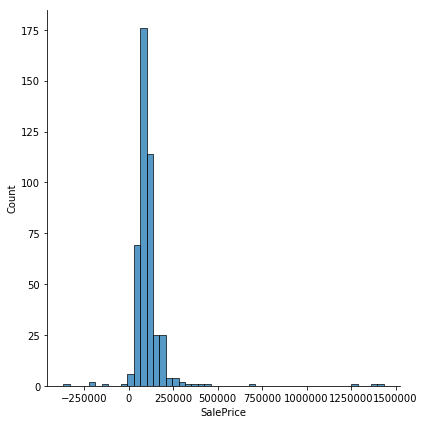

In [184]:
sns.displot((y_test-pred_stand_test),bins=50,height=6)

### Polynumial Regression model shows it does not fit the house data set 

In [173]:
from sklearn.preprocessing import PolynomialFeatures

reg_poly = PolynomialFeatures (degree = 3)

x_train_poly = reg_poly.fit_transform(x_train)
x_test_poly = reg_poly.transform(x_test)

lin_reg_poly = LinearRegression(normalize=True,
                                fit_intercept=True,
                                copy_X=True,
                                n_jobs=None)

lin_reg_poly.fit(x_train_poly,y_train)

LinearRegression(normalize=True)

In [174]:
pred_train_poly = lin_reg_poly.predict(x_train_poly)
pred_test_poly = lin_reg_poly.predict(x_test_poly)

In [175]:
print('train set Polynomial_Regression evaluation:\n________________')
print_evaluate(y_train,pred_train_poly)
print('===============')
print('test set Polynomial_Regression evaluation:\n_________________')
print_evaluate(y_test,pred_test_poly)

train set Polynomial_Regression evaluation:
________________
MAE: 4.395504241513996e-09
MSE: 4.2278188285324497e-17
RMSE: 6.5021679680952946e-09
R Square: 1.0
test set Polynomial_Regression evaluation:
_________________
MAE: 30374.88093358187
MSE: 9440108469.82307
RMSE: 97160.22061431865
R Square: -0.39050233777933796


### Compare train set and test set evaluation in RandomForestRegressor's different estimators

In [151]:
estimators=['100','300','500','700']

df_rf_test = pd.DataFrame(index=estimators,columns=['MAE','MSE','RMSE','R Square'])

df_rf_train = pd.DataFrame(index=estimators,columns=['MAE','MSE','RMSE','R Square'])

In [158]:
from sklearn.ensemble import RandomForestRegressor

def rf_evaluate(n):
    reg_rf = RandomForestRegressor(n_estimators = int(n))
    reg_rf.fit(x_train,y_train)

    pred_train_rf = reg_rf.predict(x_train)
    pred_test_rf = reg_rf.predict(x_test)

    df_rf_train.loc[n] = [*evaluate(y_train,pred_train_rf)]    
    df_rf_test.loc[n] = [*evaluate(y_test,pred_test_rf)]

    return df_rf_train,df_rf_test

In [264]:
def print_rf_pred(n):
    reg_rf = RandomForestRegressor(n_estimators = int(n))
    reg_rf.fit(x_train,y_train)

    pred_test_rf = reg_rf.predict(x_test)
    
    return pred_test_rf

In [189]:
for num in estimators:
    rf_evaluate(num)

In [190]:
df_rf_train

,MAE,MSE,RMSE,R Square
100,6778.14,1.33914e+08,11572.1,0.978046
300,6616.9,1.20437e+08,10974.4,0.980255
500,6601.1,1.22946e+08,11088.1,0.979844
700,6531.71,1.1831e+08,10877,0.980604


In [191]:
df_rf_test

,MAE,MSE,RMSE,R Square
100,16999.5,9.13505e+08,30224.3,0.865443
300,16968.1,9.31397e+08,30518.8,0.862808
500,17038.2,9.29425e+08,30486.5,0.863098
700,17023.3,9.27851e+08,30460.6,0.86333


In [193]:
df_result = pd.concat([df_rf_train,df_rf_test],keys=['test','train'])

In [252]:
df_result_rf = df_result.reset_index()
df_result_rf.rename(columns={'level_0':'dataset','level_1':'estimator'},inplace=True)

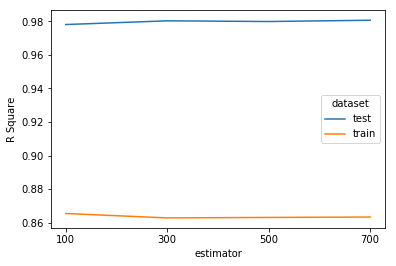

In [254]:
sns.lineplot(data=df_result_rf,x=df_result_rf['estimator'],y=df_result_rf['R Square'].astype(float), hue=df_result_rf['dataset'])

In [234]:
# sns.lineplot(data=df_rf_train,x=df_rf_train.index,y=df_rf_train['R Square'].astype(float))

In [235]:
# sns.lineplot(data=df_rf_test,x=df_rf_test.index,y=df_rf_test['R Square'].astype(float))

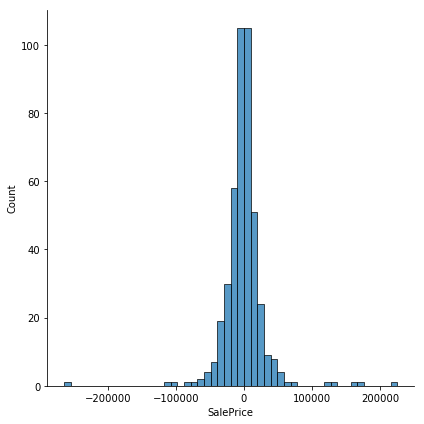

In [262]:
sns.displot((y_test-print_rf_pred(100)),bins=50,height=6)

In [263]:
evaluate_df_rf = pd.DataFrame(data=[["RandomForest Regression",*evaluate(y_test,print_rf_pred(100)),cross_val(RandomForestRegressor())]],
                      columns=['Model','MAE','MSE','RMSE','R Square','Cross Validation'])#We can use this function to see the rating of the model.

In [257]:
evaluate_df_rf

,Model,MAE,MSE,RMSE,R Square,Cross Validation
0,RandomForest Regression,16901.365137,9.133995e+08,30222.499211,0.865459,"[0.8674384362965761, 0.8522854975893845, 0.8747699069673723, 0.883128270645126, 0.8131504941966388]"


### Gradient Boost

In [265]:
from sklearn.model_selection import train_test_split

x_train_gb, x_test_gb,y_train_gb, y_test_gb = train_test_split(x_house,y_house,test_size=0.3,random_state=0)

In [288]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'loss':'huber',
        'learning_rate':0.03,
        'n_estimators': 1000,
        'subsample': 0.9,
        'min_samples_split':10,  
        'max_depth': 5,
}

gb_model= GradientBoostingRegressor(**params)
gb_model.fit(x_train_gb,y_train_gb)

train_pred_gb = gb_model.predict(x_train_gb)
test_pred_gb = gb_model.predict(x_test_gb)

print('train set GradientBoost evaluation:\n________________')
print_evaluate(y_train,train_pred_gb)
print('===============')
print('test set GradientBoost evaluation:\n_________________')
print_evaluate(y_test,test_pred_gb)

train set GradientBoost evaluation:
________________
MAE: 1544.6581755651036
MSE: 8621701.545680119
RMSE: 2936.273411261308
R Square: 0.9985865498144497
test set GradientBoost evaluation:
_________________
MAE: 15104.669828267128
MSE: 676032822.9998705
RMSE: 26000.63120387408
R Square: 0.900422201312428


In [289]:
evaluate_df_gb = pd.DataFrame(data=[["Gradient Boosting Regressor",*evaluate(y_test,test_pred_gb),cross_val(GradientBoostingRegressor())]],
                      columns=['Model','MAE','MSE','RMSE','R Square','Cross Validation'])#We can use this function to see the rating of the model.

In [290]:
evaluate_df_gb

,Model,MAE,MSE,RMSE,R Square,Cross Validation
0,Gradient Boosting Regressor,15104.669828,6.760328e+08,26000.631204,0.900422,"[0.9004592156555173, 0.8387561460944072, 0.8986747011043196, 0.9077996560749367, 0.8914536536592541]"


### Gradient Boost Deviance

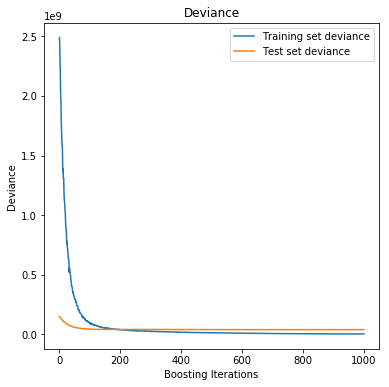

In [310]:
test_score = np.zeros((params['n_estimators'],),dtype = np.float64)

for i,y_pred in enumerate(gb_model.staged_predict(x_test_gb)):
    test_score[i]=gb_model.loss_(y_test,y_pred)
    
fig = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators'])+1,gb_model.train_score_,label='Training set deviance')
plt.plot(np.arange(params['n_estimators'])+1,test_score,label='Test set deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

### This means that the number of boosting iterations reaches after 400, is enough for the model.

In [322]:
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:5]

In [323]:
# sorted_idx
# sorted_feature.shape

array([16, 45, 37, 61, 33])

In [326]:
pos = np.arange(sorted_feature.shape[0])+.5

[Text(0, 0, 'OverallQual'),
 Text(0, 0, 'GrLivArea'),
 Text(0, 0, 'TotalBsmtSF'),
 Text(0, 0, 'GarageArea'),
 Text(0, 0, 'BsmtFinSF1')]

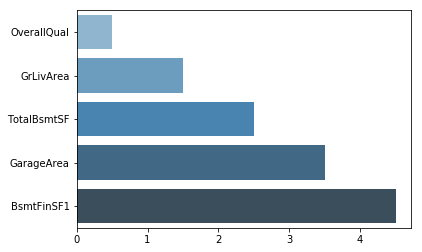

In [348]:
feature_bar = sns.barplot(y=feature_importance[sorted_feature],x=pos[:5], palette="Blues_d",orient='h')
feature_bar.set_yticklabels(np.array(x_house.columns)[sorted_idx])